# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Life Expectancy Data.csv')
dataset = dataset[dataset.Country == "India"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


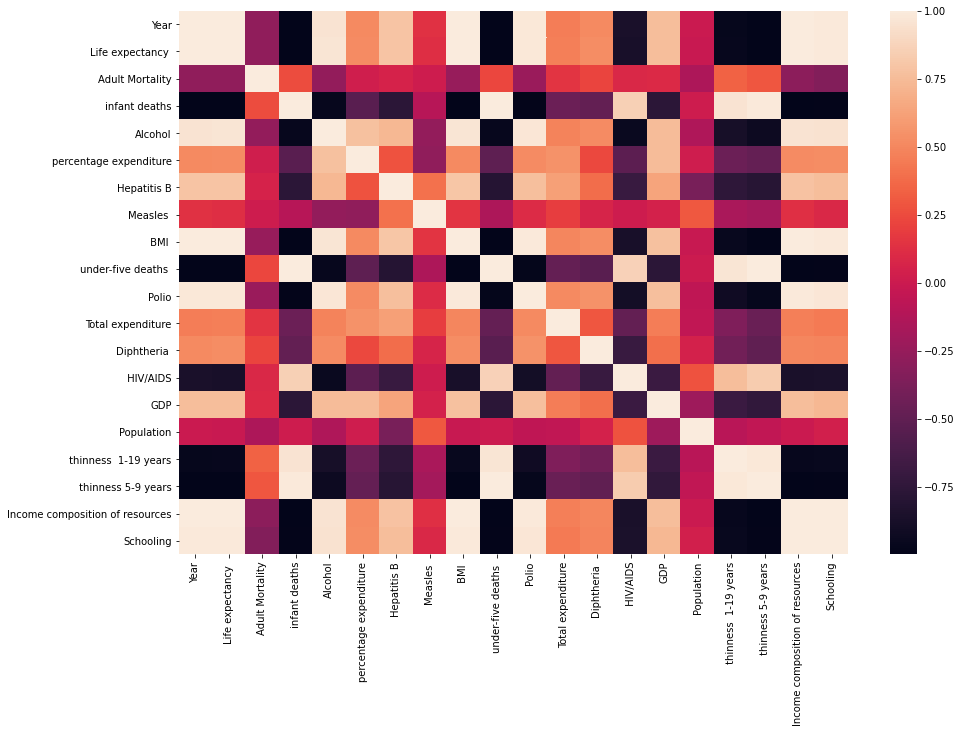

In [3]:
import seaborn as sb
plt.figure(figsize=(15,10))
sb.heatmap(dataset.corr())

In [4]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
dataset = dataset[['Alcohol',' BMI ', 'Polio','Schooling','Life expectancy ']]

In [6]:
dataset

,Alcohol,BMI,Polio,Schooling,Life expectancy
1186,NaN,18.7,86.0,11.6,68.3
1187,3.07,18.1,84.0,11.6,68.0
1188,3.11,17.5,82.0,11.5,67.6
1189,3.10,17.0,79.0,11.3,67.3
1190,3.00,16.4,79.0,10.8,66.8
1191,2.77,15.9,76.0,10.4,66.4
1192,2.50,15.4,73.0,10.5,66.0
1193,1.93,14.9,69.0,10.2,65.5
1194,1.59,14.4,67.0,9.9,65.2
1195,1.37,13.9,66.0,9.7,64.8


# Handeling Missing data

In [7]:
np.sum(dataset.isnull())

Alcohol             1
 BMI                0
Polio               0
Schooling           0
Life expectancy     0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset)
dataset = imputer.transform(dataset)

In [9]:
x = dataset[:, :-1]
y = dataset[:, -1]

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11, 4), (5, 4), (11,), (5,))

## Training the Multiple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [13]:
y_pred = regressor.predict(x_test)

In [14]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1,))

[[65.08 65.2 ]
 [64.04 64.  ]
 [64.62 64.8 ]
 [66.34 66.4 ]
 [68.1  68.  ]]


# Conclusion

> As per the study of data* and selection of variable, I can conclude that life expectancy can be improv by improving the BMI index

> Data: https://www.kaggle.com/kumarajarshi/life-expectancy-who